In [ ]:
!pip install yfinance pandas matplotlib plotly scikit-learn seaborn


In [75]:
#IMPORTING USEFUL LIBRARIES

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from datetime import datetime



In [ ]:
#ACCESS THE STOCK MARKET DATA

stock = yf.Ticker("TSLA")
df = stock.history(period="1y")  # or "1y", "5d", etc.
df.reset_index(inplace=True)
df.head(365)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-07-26 00:00:00-04:00,221.190002,222.279999,215.330002,219.800003,94604100,0.0,0.0
1,2024-07-29 00:00:00-04:00,224.899994,234.270004,224.699997,232.100006,129201800,0.0,0.0
2,2024-07-30 00:00:00-04:00,232.250000,232.410004,220.000000,222.619995,100560300,0.0,0.0
3,2024-07-31 00:00:00-04:00,227.899994,234.679993,226.789993,232.070007,67497000,0.0,0.0
4,2024-08-01 00:00:00-04:00,227.690002,231.869995,214.330002,216.860001,83861900,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2025-07-21 00:00:00-04:00,334.399994,338.000000,326.880005,328.489990,75768800,0.0,0.0
246,2025-07-22 00:00:00-04:00,329.739990,335.410004,321.549988,332.109985,77370400,0.0,0.0
247,2025-07-23 00:00:00-04:00,330.899994,336.200012,328.670013,332.559998,92553800,0.0,0.0
248,2025-07-24 00:00:00-04:00,310.000000,310.149994,300.410004,305.299988,156966000,0.0,0.0


In [ ]:
#SUMMARY OF THE DATA

print(df.describe())  #provides a statistical summary of a DataFrame or Series
# print(df.info())      # provides a concise summary of a DataFrame


             Open        High         Low       Close        Volume  \
count   15.000000   15.000000   15.000000   15.000000  1.500000e+01   
mean   313.510663  319.390000  309.474001  314.929331  9.767514e+07   
std     13.318250   13.173103   12.358770   12.848937  2.717388e+07   
min    291.369995  296.149994  288.769989  293.940002  7.392290e+07   
25%    303.970001  310.315002  300.205002  307.584991  7.746335e+07   
50%    312.799988  322.600006  310.500000  316.059998  9.255380e+07   
75%    322.404999  327.619995  319.240005  325.080002  1.038060e+08   
max    334.399994  338.000000  328.670013  332.559998  1.569660e+08   

       Dividends  Stock Splits  
count       15.0          15.0  
mean         0.0           0.0  
std          0.0           0.0  
min          0.0           0.0  
25%          0.0           0.0  
50%          0.0           0.0  
75%          0.0           0.0  
max          0.0           0.0  


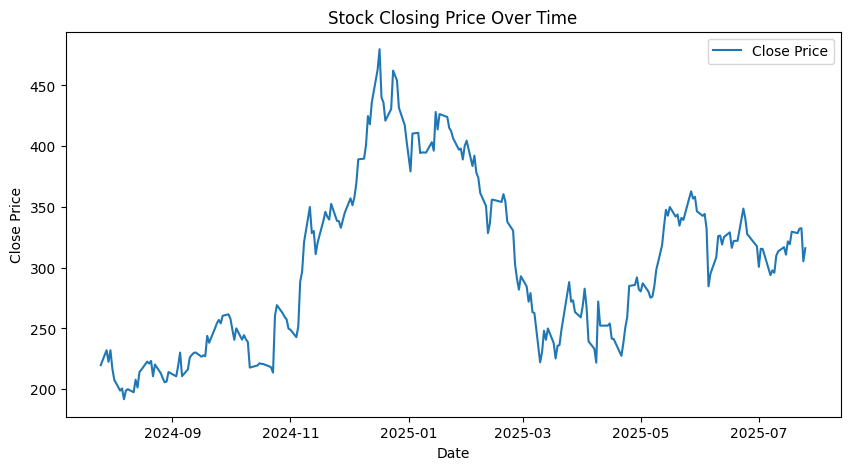

In [ ]:
#PLOTTING DATE VS PRICE CHART

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
# plt.plot(df['Date'], df['Close'])
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
# plt.grid(True)
plt.show()


In [ ]:
#CANDLESTICK REPRESENTATION

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])
fig.update_layout(title='Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()


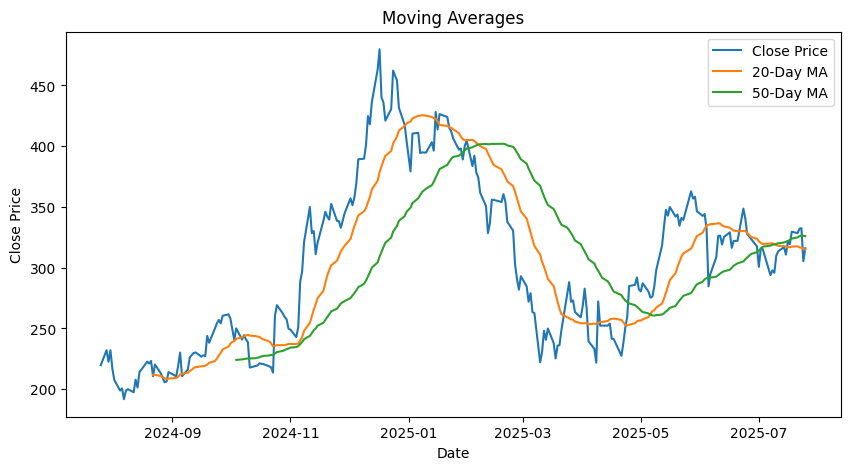

In [ ]:
#MOVING AVERAGES(.rolling method())

df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Moving Averages')
plt.legend()
plt.show()


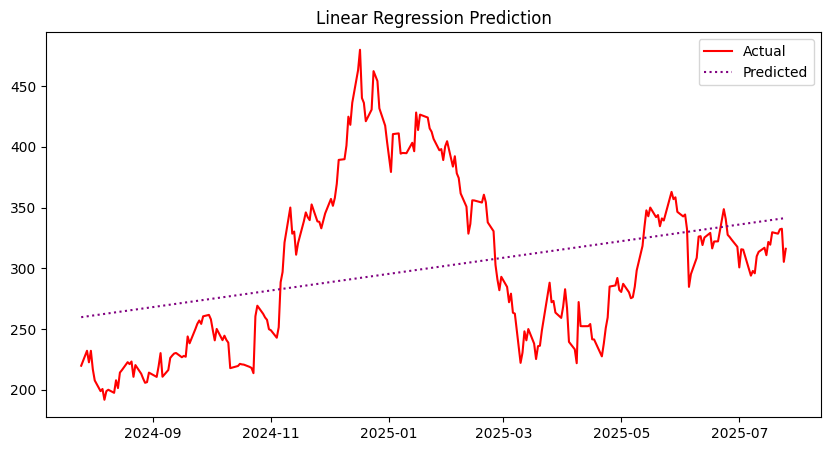

In [ ]:
#Predict using LINEAR REGRESSION

df['Date_ordinal'] = pd.to_datetime(df['Date']).map(datetime.toordinal)

X = df[['Date_ordinal']]
y = df['Close']

model = LinearRegression()
model.fit(X, y)

df['Predicted'] = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Actual', color='red')
plt.plot(df['Date'], df['Predicted'], label='Predicted', linestyle=':',color='purple')
plt.title('Linear Regression Prediction')
plt.legend()
plt.show()


In [63]:
#AUTOMATE

def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period="1y")
    df.reset_index(inplace=True)
    return df

data = get_stock_data("TSLA")


In [ ]:
pip install streamlit  #frontend without HTML,CSS,JS


In [80]:
df['O-C'] = df['Open'] - df['Close']
df['L-H'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

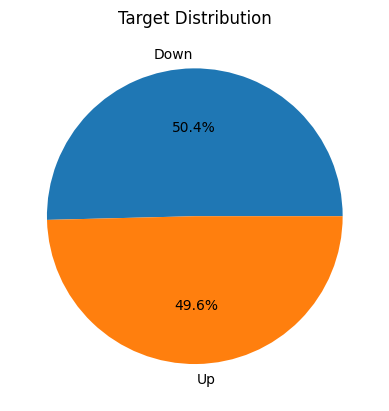

In [83]:
plt.pie(df['target'].value_counts(), labels=['Down', 'Up'], autopct='%1.1f%%') # will display percentages with one decimal place followed by a percent sign
plt.title('Target Distribution')
plt.show()

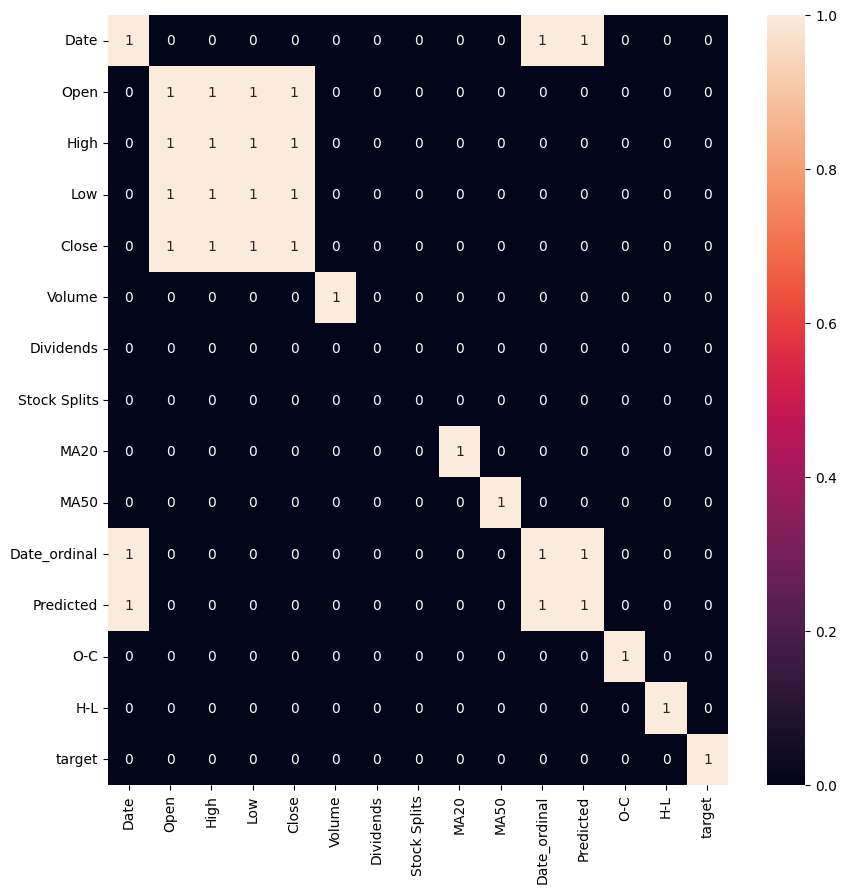

In [89]:
 plt.figure(figsize=(10,10))
 sb.heatmap(df.corr()>0.9, annot=True,cbar='False')
 #annot --> numerical data within each cell in heatmap
 #cbar --> if true(shows the color gradient), if false(hide the color)
 plt.show()


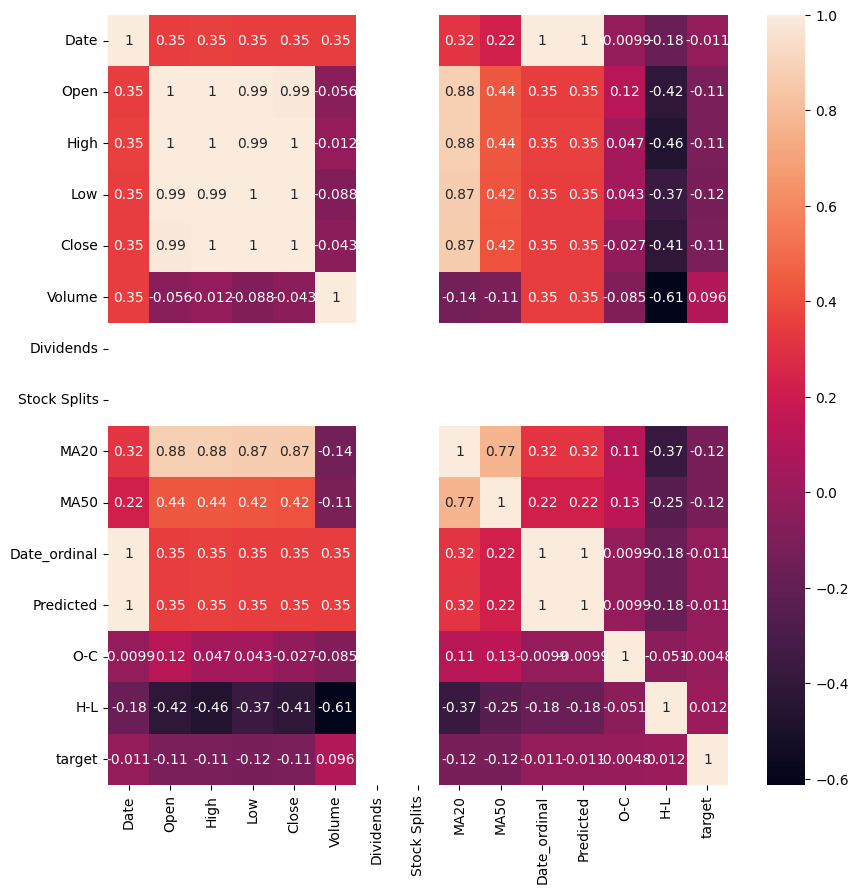

In [92]:
 plt.figure(figsize=(10,10))
 sb.heatmap(df.corr(), annot=True,cbar='True' )
 plt.show()